In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

### Задача 1
* Реализовать функцию 'plot_horizontal_bar', рисующую горизонтальные бары.

In [21]:
# Реализация функции
def plot_horizontal_bar(bars_length: np.array, 
                        yticks_labels: list, 
                        labels: list, 
                        figuresize: tuple):
    """ Функция, которая рисует горизонтальные бары
    """
    
    fig, ax = plt.subplots(figsize=figuresize)
    y_coordinates = np.arange(len(yticks_labels))
    
    # функция для отрисовки горизонтальных баров в matplotlib-е
    ax.barh(y_coordinates, bars_length, label=labels, align='center')
    ax.set_yticks(y_coordinates)
    ax.set_yticklabels(yticks_labels)
    
    func = lambda x: x if x > 0 else 0
    for ind, label in enumerate(labels):
        ax.annotate(label, xy = (func(bars_length[ind]), y_coordinates[ind]))
    plt.grid(True)
    plt.show()

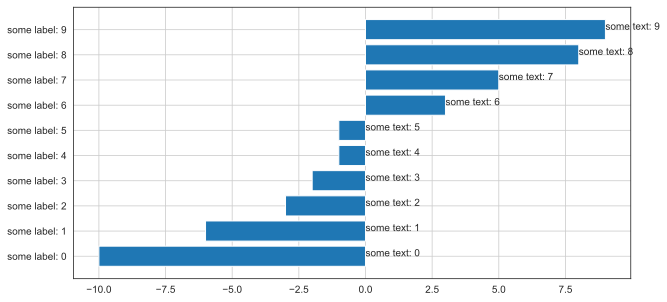

In [23]:
# Сигнатура функции и пример вывода:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()
yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (10, 5)

plot_horizontal_bar(bars_length, yticks_labels, labels, figsize)

### Задача 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [69]:
def plot_time_probabilities(probabilities_in_time, 
                            figuresize, 
                            colors):
    """ Функция, которая отрисовывет изменяющиеся во времени вероятности неких событий
    """
    
    for i in range(probabilities_in_time.shape[1]-1):
        probabilities_in_time[i+1] += probabilities_in_time[i]
    
    probabilities_in_time.plot(cmap='Spectral', figsize=figuresize)
    
    for i in range(probabilities_in_time.shape[1]-1):
        if i == 0:
            plt.fill_between(probabilities_in_time.index, probabilities_in_time[i], color=colors[-i])
            plt.fill_between(probabilities_in_time.index, probabilities_in_time[i], probabilities_in_time[i+1], color=colors[-i-1])
        else:
            plt.fill_between(probabilities_in_time.index, probabilities_in_time[i], probabilities_in_time[i+1], color=colors[-i-1])

In [70]:
# Сигнатура функции и пример вывода:
datetime_array = pd.date_range('2012-01-01', '2022-03-05', freq='2W')
probabilities_in_time = np.random.random((10, len(datetime_array)))
probabilities_in_time /=  probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = datetime_array
colors = ("#5e4fa2", "#3288bd", "#66c2a5", "#abdda4", "#e6f598", "#fee08b", "#fdae61", "#f46d43", "#d53e4f", "#9e0142")
probabilities_in_time

,0,1,2,3,4,5,6,7,8,9
2012-01-01,0.002708,0.166637,0.167328,0.200417,0.044966,0.147425,0.103304,0.098976,0.020350,0.047889
2012-01-15,0.020479,0.092091,0.135906,0.159753,0.015072,0.081188,0.085868,0.097578,0.244493,0.067572
2012-01-29,0.114084,0.075638,0.208095,0.046291,0.078121,0.005201,0.017590,0.115835,0.208781,0.130365
2012-02-12,0.101652,0.136619,0.169951,0.129088,0.034568,0.099527,0.048784,0.129945,0.004553,0.145312
2012-02-26,0.047464,0.019337,0.002035,0.180918,0.126020,0.084290,0.134314,0.120358,0.134316,0.150949
...,...,...,...,...,...,...,...,...,...,...
2022-01-02,0.069293,0.008217,0.148180,0.001411,0.151179,0.221135,0.172774,0.072392,0.089598,0.065821
2022-01-16,0.001148,0.031837,0.060867,0.108170,0.093184,0.159253,0.006184,0.124974,0.185465,0.228917
2022-01-30,0.135223,0.061261,0.113521,0.063606,0.107199,0.152113,0.080461,0.081649,0.050455,0.154513
2022-02-13,0.025833,0.113109,0.058823,0.117078,0.017037,0.140986,0.135320,0.167118,0.149410,0.075286


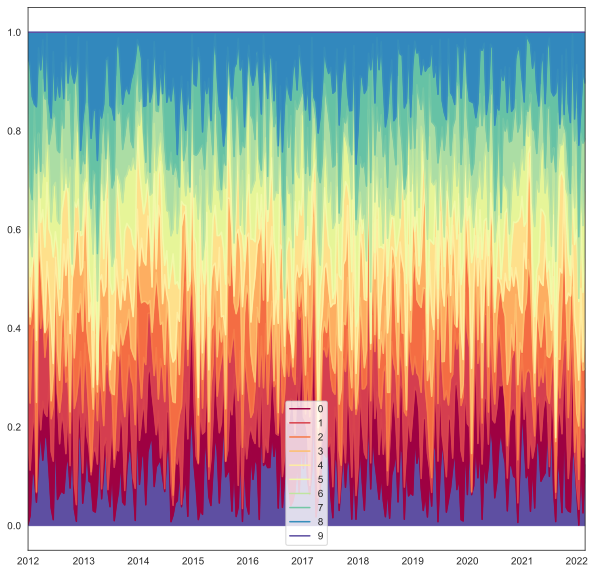

In [71]:
plot_time_probabilities(probabilities_in_time, (10, 10), colors)